In [7]:
import spot
spot.setup(show_default='.a')

In [112]:
def simpl(form):
    f = spot.formula(form).simplify().unabbreviate('WM')
    display(f)
    return f.to_str(parenth=True)

* literature_full [DONE]
* literature_ltl3dra [DONE]
* random_ltl3dra [DONE]
* random_full [DONE]
* random_fg [DONE]

# Bugs

## Spot
* bug in TELA->TGBA conversion found in *random_ltl3dra* on formula `'F((G(a)) | (G((b) | (F(c)))))'` is described in [Spot_TELA2TGBA](Spot_TELA2TGBA.ipynb)
  - also for [190]: `(a | b | G((Gc & F!d) | (F!c & Gd))) U a`
  - also for [304]: `((p0) & (F(p1)) & (F(((F(p1)) & (G(!(p0)))) | ((F(p0)) & (G(!(p1))))))) | (((!(p0)) | (G(!(p1)))) & (G(((F(p0)) & (F(p1))) | (G((!(p0)) & (!(p1)))))))`
  - also for [351]: `F((G(p0)) | ((F(!(p1))) & ((!(p2)) | (!(p3)) | (F(p0)))) | ((p2) & (p3) & (G((!(p0)) & (p1)))))`
  - also for all formulas from random_fg_bogus.ltl
* Bug in transformation of T->S-based automata found in *random_full* described in [Spot_complete](Spot_complete.ipynb)
* [18_01_05]: ltlcross core dumps [(details)](Spot_ltlcross_core_dump.ipynb)

## LTL3TELA
* seg fault on `Fp0 | (!p0 & Fp2)` and `!(Fp0 | (!p0 & Fp2))`  found in *random_ltl3dra* on formula `(F(p0)) | ((!(p0)) & ((G(p1)) U (p2)))` is described in [LTL3TELA](LTL3TELA.ipynb)

## Rab3.1
* Empty automaton for `Ga & X(a & Gb)` found in *random_ltl3dra* on formula `a & Gb & X((Xb & G(c & !d)) | (X!b & F(!c | d)))` [184] is described in [Rab3.1_no_acc](Rab3.1_no_acc.ipynb)

## Rab4
* Bug in `ltl2dpa --mode=ldba` from **Rab4-01_17** is described in [ltl2dpa_Jan_17](ltl2dpa_Jan_17.ipynb)
* Bug in `ltl2dpa --mode=ldba` from Rab4 found from *literature_full* on formula `!((F(p0)) & (((p1) & ((p0) R ((p0) | (p2)))) R (!(p0))))` is described in [ltl2dpa_ldba_bug](ltl2dpa_ldba_bug.ipynb)
* Bug in `ltl2dpa --mode=ldba` from Rab4 found from *literature_ltl3dra* on formula `(G(!(p0))) | (((p1) | ((!(p0)) U ((!(p0)) & (p2) & (X((!(p0)) U (p3)))))) U (p0))` is described in [ltl2dpa_ldba](ltl2dpa_ldba.ipynb)
* Bug and nondeterminism in `ltl2dgra` revealed. It was found in *random_full* on formula [481]: `'G(F(((p0) & ((p0) R (F(p1))) & (F(((p2) & (X(p0))) | ((!(p2)) & (X(!(p0))))))) | (((!(p0)) U (G(!(p1)))) & ((!(p0)) | (G(((p2) & (X(!(p0)))) | ((!(p2)) & (X(p0)))))))))'`. It is described in [Rabinizer4](Rabinizer4.ipynb)

# Working logs

All but last bogus formula in random_full are caused by Rab3.1 using too many acceptance sets for Spot to parse.

In [267]:
!grep error -B2 -F random_full.log

Running [P6]: ltl2dstar -H -t "ltl3ba -M1 -H3 -f %s > %H" 'lcr-i33-a9YXEg' 'lcr-o6-hBoW6S'
Running [P7]: java -jar Rab3/rabinizer3.1.jar -silent -format=hoa -out=std -auto=sr '((F(G(((p1) & (G(!(p2)))) | ((!(p1)) & (F(p2)))))) & ((!(p0)) U (!(p1)))) | ((G(F(((p1) & (F(p2))) | ((!(p1)) & (G(!(p2))))))) & ((p1) U (((p0) & (p1)) | (G(p1)))))' > 'lcr-o7-OicIHv'
error: failed to parse the produced automaton.
--
Running [P21]: ltl2tgba -B -f '(((p0) R (p1)) & (G(F(((p1) & (F(p2))) | ((!(p1)) & (G(!(p2)))))))) | ((F(G(((p1) & (G(!(p2)))) | ((!(p1)) & (F(p2)))))) & ((!(p0)) U (!(p1))))' | ltl2dstar -B -H - - > 'lcr-o21-OuN73A'
Running [P22]: java -jar Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '((F(G(((p1) & (G(!(p2)))) | ((!(p1)) & (F(p2)))))) & ((!(p0)) U (!(p1)))) | ((G(F(((p1) & (F(p2))) | ((!(p1)) & (G(!(p2))))))) & ((p1) U (((p0) & (p1)) | (G(p1)))))' > 'lcr-o22-fEgGil'
error: failed to parse the produced automaton.
--
Running [P6]: ltl2dstar -H -t "ltl3ba -M1 -H3 -f %s > %H" 'lc

All bogus formulas from random_fg are due to the TELA->TGBA bug in Spot

In [283]:
!grep error -C1 -F random_fg.log

Performing sanity checks and gathering statistics...
error: P0*N17 is nonempty; both automata accept the infinite word:
       !p0 & !p1 & p2; cycle{!p0 & !p1 & p2; p0 & !p1 & p2}
error: P0*N28 is nonempty; both automata accept the infinite word:
       !p0 & !p1 & p2; cycle{!p0 & !p1 & p2; p0 & !p1 & p2}
error: P1*N17 is nonempty; both automata accept the infinite word:
       cycle{p0 & !p1 & p2}
error: P1*N28 is nonempty; both automata accept the infinite word:
       cycle{p0 & !p1 & p2}
error: P2*N17 is nonempty; both automata accept the infinite word:
       !p0 & !p1 & p2; cycle{p0 & !p1 & p2}
error: P2*N28 is nonempty; both automata accept the infinite word:
       !p0 & !p1 & p2; cycle{p0 & !p1 & p2}
error: P3*N17 is nonempty; both automata accept the infinite word:
       cycle{!p0 & !p1 & p2; !p0 & !p1; p0 & !p1 & !p2}
error: P3*N28 is nonempty; both automata accept the infinite word:
       !p0 & !p1 & !p2; cycle{!p0 & !p1; p0 & !p1 & !p2; !p1 & p2}
error: P4*N17 is nonempt

# Working area

In [88]:
f = 'p1 | F p0 | F p1'

In [89]:
!/home/xblahoud/spot_dev/bin/ltlcross 'java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std %[RMW]f > %O' --timeout=300 --automata --products=0 --grind=/tmp/rab3.ltl ltl2tgba -f "{f}"

(p1) | (F(p0)) | (F(p1))
Running [P0]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '(p1) | (F(p0)) | (F(p1))' > 'lcr-o0-kMgCNd'
Running [P1]: ltl2tgba -H '(p1) | (F(p0)) | (F(p1))'>'lcr-o1-toiXzy'
Running [N0]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '!((p1) | (F(p0)) | (F(p1)))' > 'lcr-o0-1WUopT'
Running [N1]: ltl2tgba -H '!((p1) | (F(p0)) | (F(p1)))'>'lcr-o1-pWlOcf'
Performing sanity checks and gathering statistics...
error: Comp(N0)*Comp(P0) is nonempty; both automata accept the infinite word:
       cycle{!p0 & !p1}

Trying to find a bogus mutation of p1 | F p0 | F p1...
Mutation 1/6: 1
Running [P0]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '1' > 'lcr-o0-aWma3A'
Running [P1]: ltl2tgba -H '1'>'lcr-o1-0p4HRX'
Running [N0]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '0' > 'lcr-o0-trVQJk'
Running [N1]: ltl2tgba -H '0'>'lcr-o1-mlhhwI'
Performing sanity checks and gathering statistics...

Mutation 2/6

In [1]:
import spot
spot.setup(show_default='.a')

In [61]:
f = '(p1 | X!p2) W Fp0'

In [62]:
!ltlcross '../Rab4/bin/ltl2dpa --mode=ldba' ltl2tgba -f "{f}"

((p1) | (X(!(p2)))) W (F(p0))
Running [P0]: ../Rab4/bin/ltl2dpa --mode=ldba '((p1) | (X(!(p2)))) W (F(p0))'>'lcr-o0-363wcs'
Running [P1]: ltl2tgba -H '((p1) | (X(!(p2)))) W (F(p0))'>'lcr-o1-hKLAOv'
Running [N0]: ../Rab4/bin/ltl2dpa --mode=ldba '!(((p1) | (X(!(p2)))) W (F(p0)))'>'lcr-o0-6pP8sz'
Running [N1]: ltl2tgba -H '!(((p1) | (X(!(p2)))) W (F(p0)))'>'lcr-o1-ZQHZuF'
Performing sanity checks and gathering statistics...
error: Comp(N0)*Comp(P0) is nonempty; both automata accept the infinite word:
       cycle{!p0 & !p1; !p0 & p1 & !p2}

error: some error was detected during the above runs,
       please search for 'error:' messages in the above trace.


In [63]:
p = spot.automaton('../Rab4/bin/ltl2dpa --mode=ldba "'+f+'" |')
n = spot.automaton('../Rab4/bin/ltl2dpa --mode=ldba "!({})" |'.format(f))

In [64]:
spot.formula(f)

(p1 | X!p2) W Fp0

The word $\{p3\}^\omega$ is not in $L(f)$ and thus should be rejected by $p$ and accepted by $n$. However, it is rejected by both.

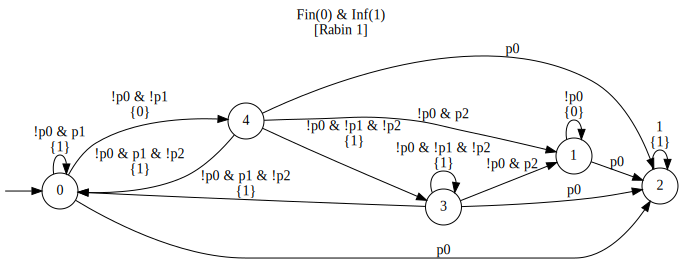

In [65]:
p

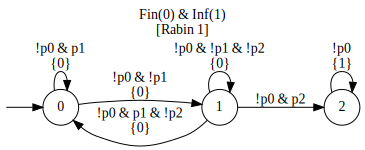

In [66]:
n